###  TODO  Exercise 7. ex
RENOIR
### You are given a ”renoir” set of two images (reference and noisy) from the RENOIR dataset 2 .
(a) Visualise all color channels of both images. 
Are the all channels equally affected by the noise?

No green not affected as much as red and blue.

In [1]:
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import cv2
import numpy as np

im1 = ndimage.imread("./data/renoir/Reference.bmp")
im1 = np.asarray(im1)
im2 = ndimage.imread("./data/renoir/Noisy.bmp")
im2 = np.asarray(im2)
plt.imshow(im1, cmap=plt.cm.Spectral)
plt.show()
plt.imshow(im2, cmap=plt.cm.Spectral)
plt.show()

#plt.colormaps()

red_images = im2[:,:,0]
green_images = im2[:,:,1]
blue_images = im2[:,:,2]
plt.imshow(red_images, cmap=plt.cm.Reds)
plt.show()
plt.imshow(green_images, cmap=plt.cm.Greens)
plt.show()
plt.imshow(blue_images, cmap=plt.cm.Blues)
plt.show()



/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### (b) Try to decrease the noise via image down/up sampling.
### b.a) Do it for the RGB image. Measure the PSNR between the reference and de-noised images 3 .

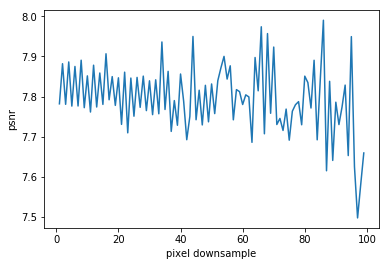

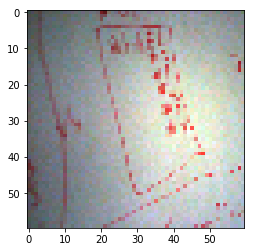

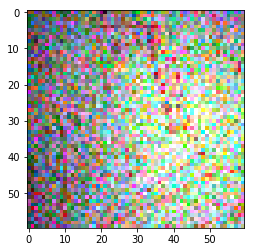

In [7]:
from helpers import mse
import math
# Downsample an image by skipping indicies
def downsample_image(img, skip):
     return img[::skip,::skip]

def psnr(mseres, PIXEL_MAX_SQUARE = 255):
    mse_square = math.sqrt(mseres )
    part1 =  math.log10(PIXEL_MAX_SQUARE / mse_square)
    return 20 * part1

mse(im1, im2),psnr(mse(im1, im2))


#downsampling
psnr_list = [psnr(mse( downsample_image(im1, skip), downsample_image(im2, skip))) for skip in range(1,100)]
plt.plot([skip for skip in range(1,100)], psnr_list)
plt.xlabel("pixel downsample")
plt.ylabel("psnr")
plt.show()

plt.imshow(downsample_image(im1, 50))
plt.show()
plt.imshow(downsample_image(im2, 50))
plt.show()


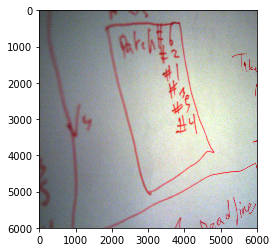

57.29515427642124

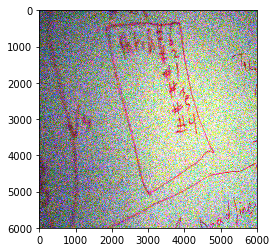

In [5]:
#upsampling using scipy.ndimage 
import skimage.transform
def upsample_skimage(factor, input_img):
    
    # Pad with 0 values, similar to how Tensorflow does it.
    # Order=1 is bilinear upsampling
    return skimage.transform.rescale(input_img,
                                     factor,
                                     mode='constant',
                                     cval=0,
                                     order=1)

upsampled_im1 = upsample_skimage(factor=2, input_img=im1)
upsampled_im2 = upsample_skimage(factor=2, input_img=im2)
plt.imshow(upsampled_im1)
plt.show()
plt.imshow(upsampled_im2)
psnr(mse(upsampled_im1,upsampled_im2))


### b.b) Do it for the grayscale image. Measure the PSNR between the grayscale reference and de-noised images.


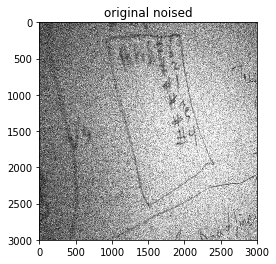


19.06967847453363


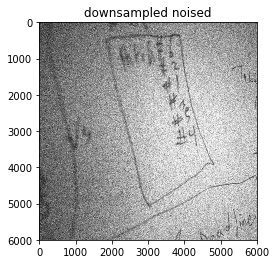

69.69328981609551

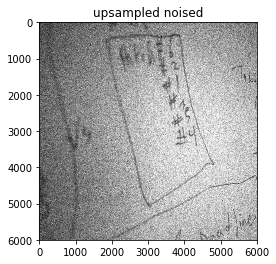

In [15]:
im1_gr = cv2.cvtColor(
    im1, 
    cv2.COLOR_RGB2GRAY    
)
im2_gr = cv2.cvtColor(
    im2, 
    cv2.COLOR_RGB2GRAY    
)
plt.title("original noised")
plt.imshow(im2_gr, cmap = 'gray' )
plt.show()

d1=downsample_image(im1_gr, 3)
d2=downsample_image(im2_gr, 3)
print(psnr(mse( d1, d2)))
plt.imshow(upsampled_im2, cmap = 'gray')
plt.title("downsampled noised")
plt.show()

#upscale
upsampled_im1 = upsample_skimage(factor=2, input_img=im1_gr)
upsampled_im2 = upsample_skimage(factor=2, input_img=im2_gr)
plt.title("upsampled noised")
plt.imshow(upsampled_im2, cmap = 'gray')
psnr(mse(upsampled_im1,upsampled_im2))

### b.c) Do the denoising for the RGB image and after convert it to the grayscale. Measure
the PSNR. Does the obtained result is different from the (b)? Explain the r
<br>


### (c) What other methods can you suggest to improve the noisy image quality?

Deep neural network autoencoder eg. https://papers.nips.cc/paper/4686-image-denoising-and-inpainting-with-deep-neural-networks.pdf